## Precision-Recall-Curves

[Machine Learning with Imbalanced Data - Course](https://www.trainindata.com/p/machine-learning-with-imbalanced-data)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    precision_recall_curve,
    PrecisionRecallDisplay,
    average_precision_score,
    auc,
)

## Load data

In [2]:
# load data
data = pd.read_csv('../kdd2004.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1:0, 1:1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [3]:
# imbalanced target

data.target.value_counts(normalize=True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

In [7]:
# separate dataset into train and test

data_b = pd.concat([
    data[data["target"] == 1],
    data[data["target"] == 0].sample(1296, random_state=1)
    ], axis=0)

data_b.target.value_counts(normalize=True)

target
1    0.505787
0    0.494213
Name: proportion, dtype: float64

In [8]:
data_01 = pd.concat([
    data[data["target"] == 1],
    data[data["target"] == 0].sample(12960, random_state=1)
    ], axis=0)

data_01.target.value_counts(normalize=True)

target
0    0.909091
1    0.090909
Name: proportion, dtype: float64

In [9]:
data.target.value_counts(normalize=True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

In [12]:
plt.rcParams["figure.dpi"] = 800

## Precision-Recall Curve - Plot

[plot_precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_precision_recall_curve.html)

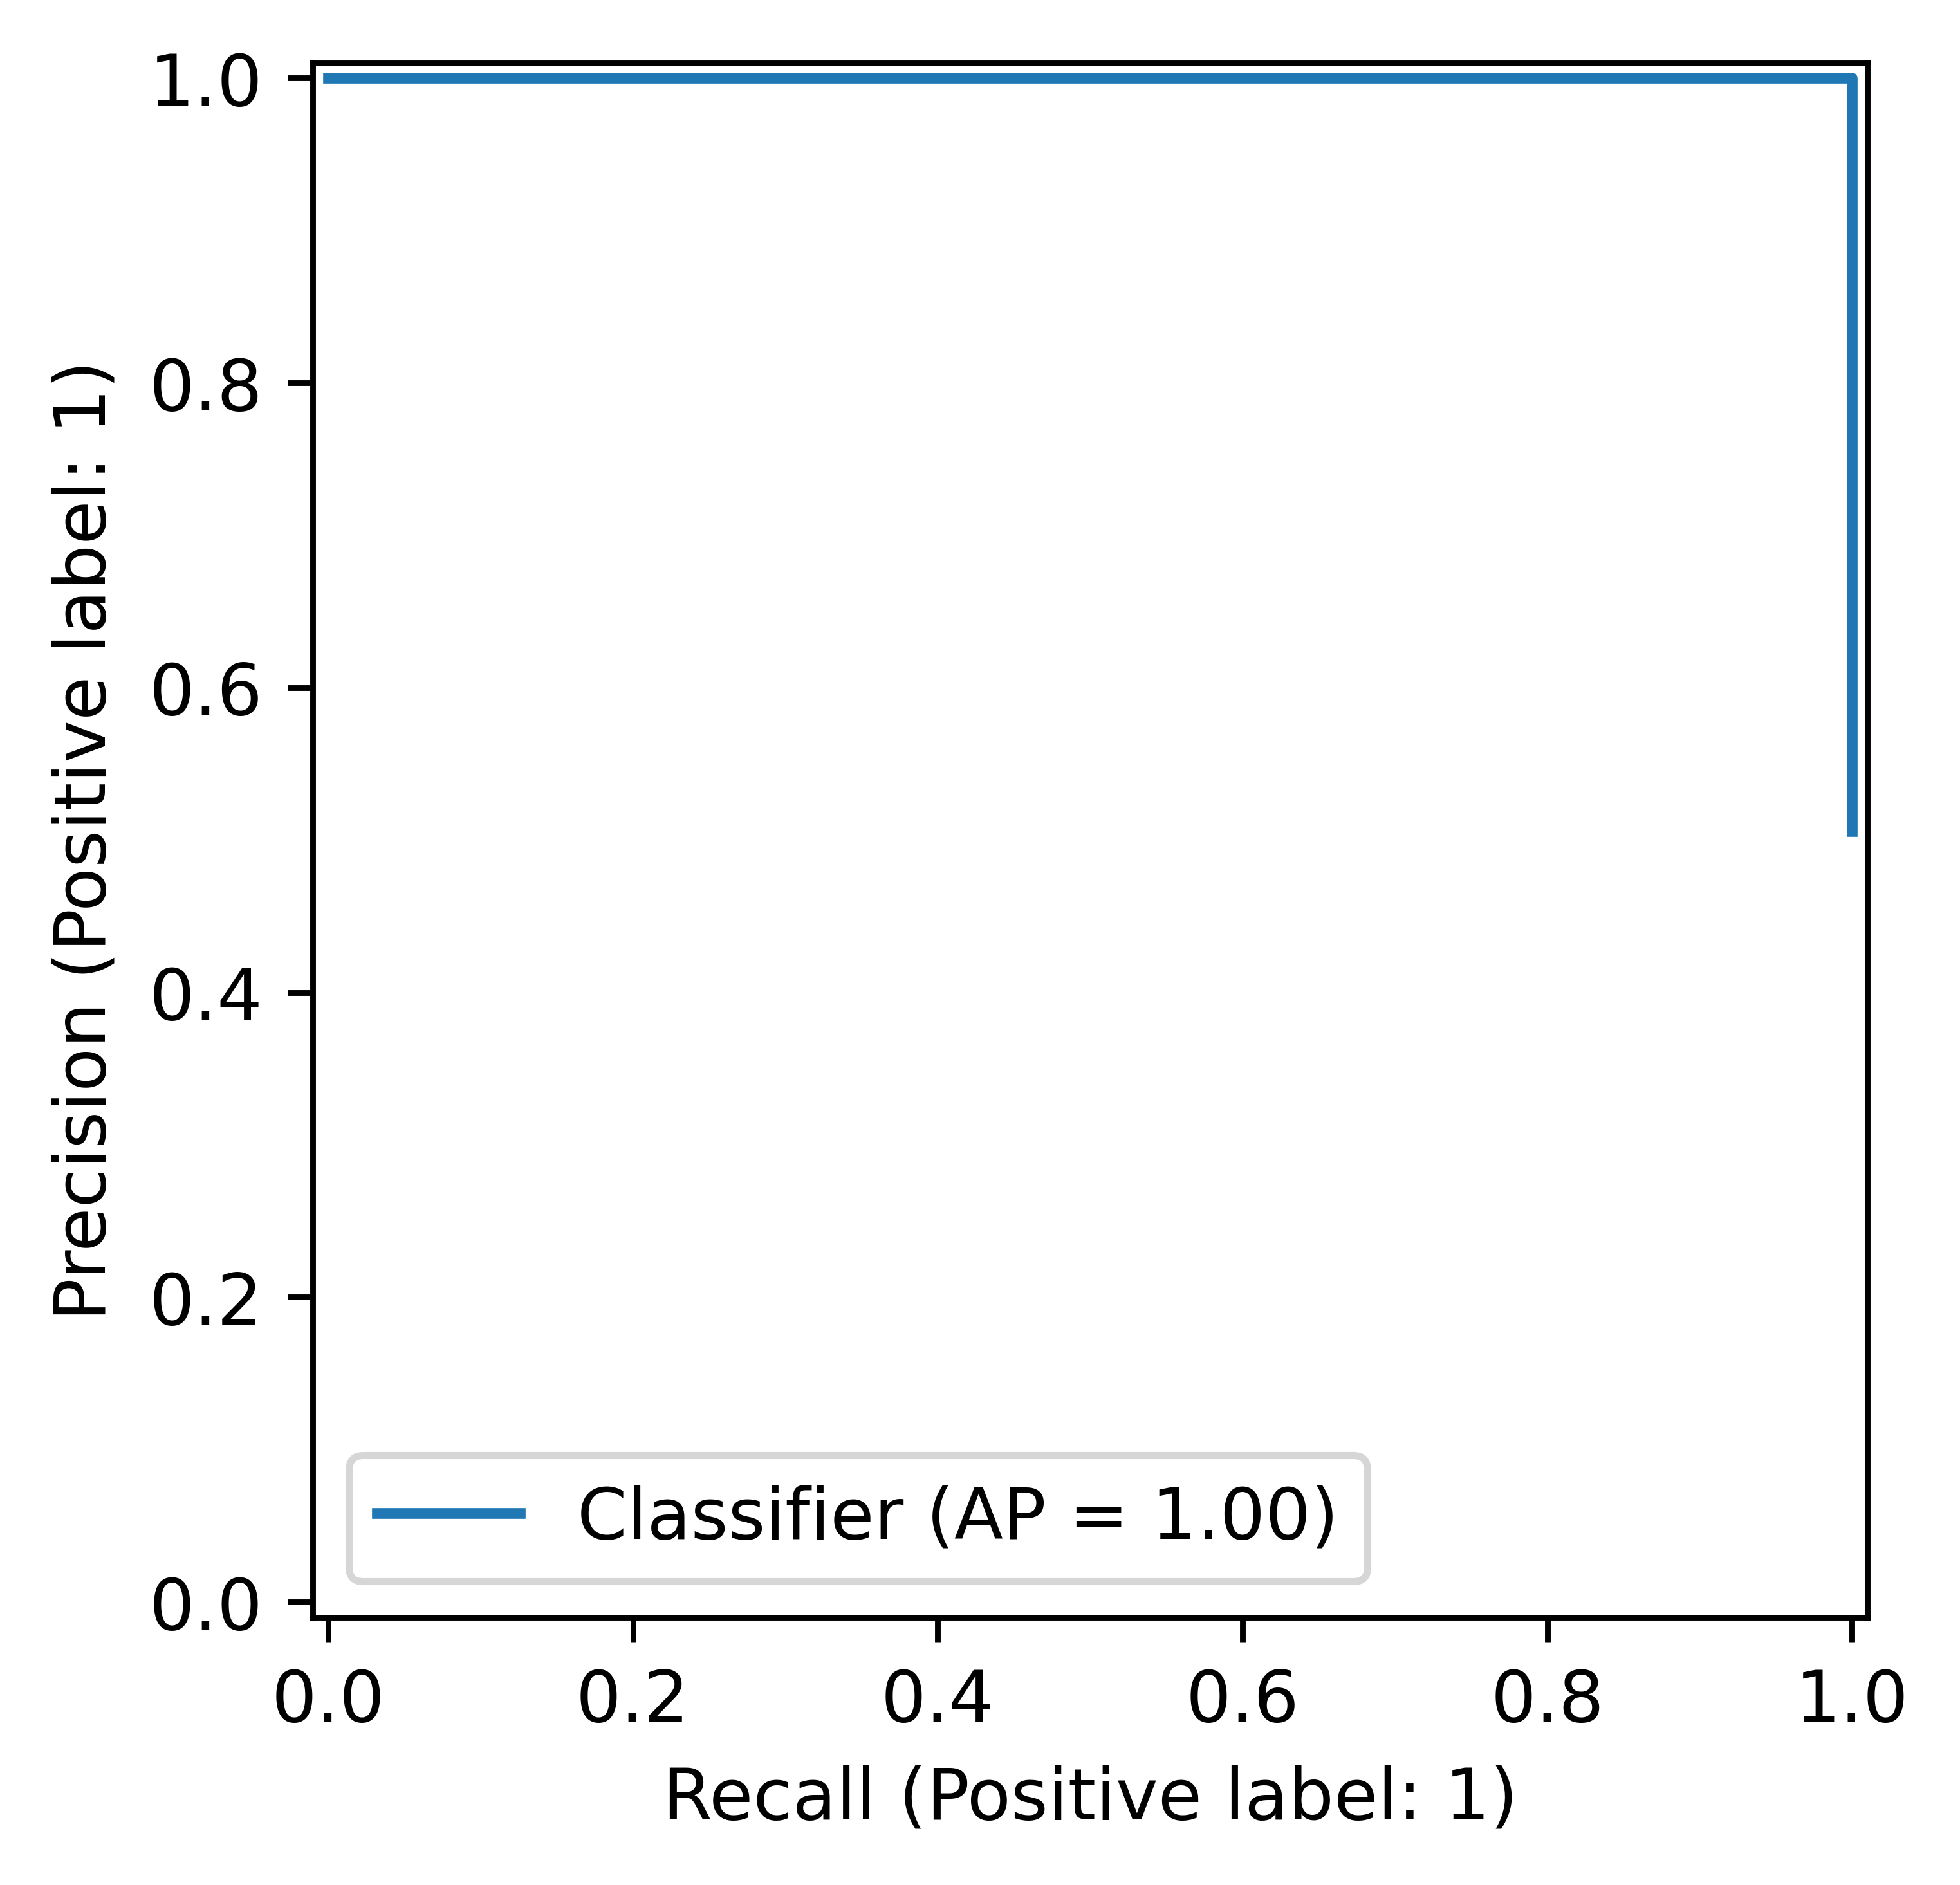

In [13]:
# perfect model

PrecisionRecallDisplay.from_predictions(data_b.target, data_b.target)

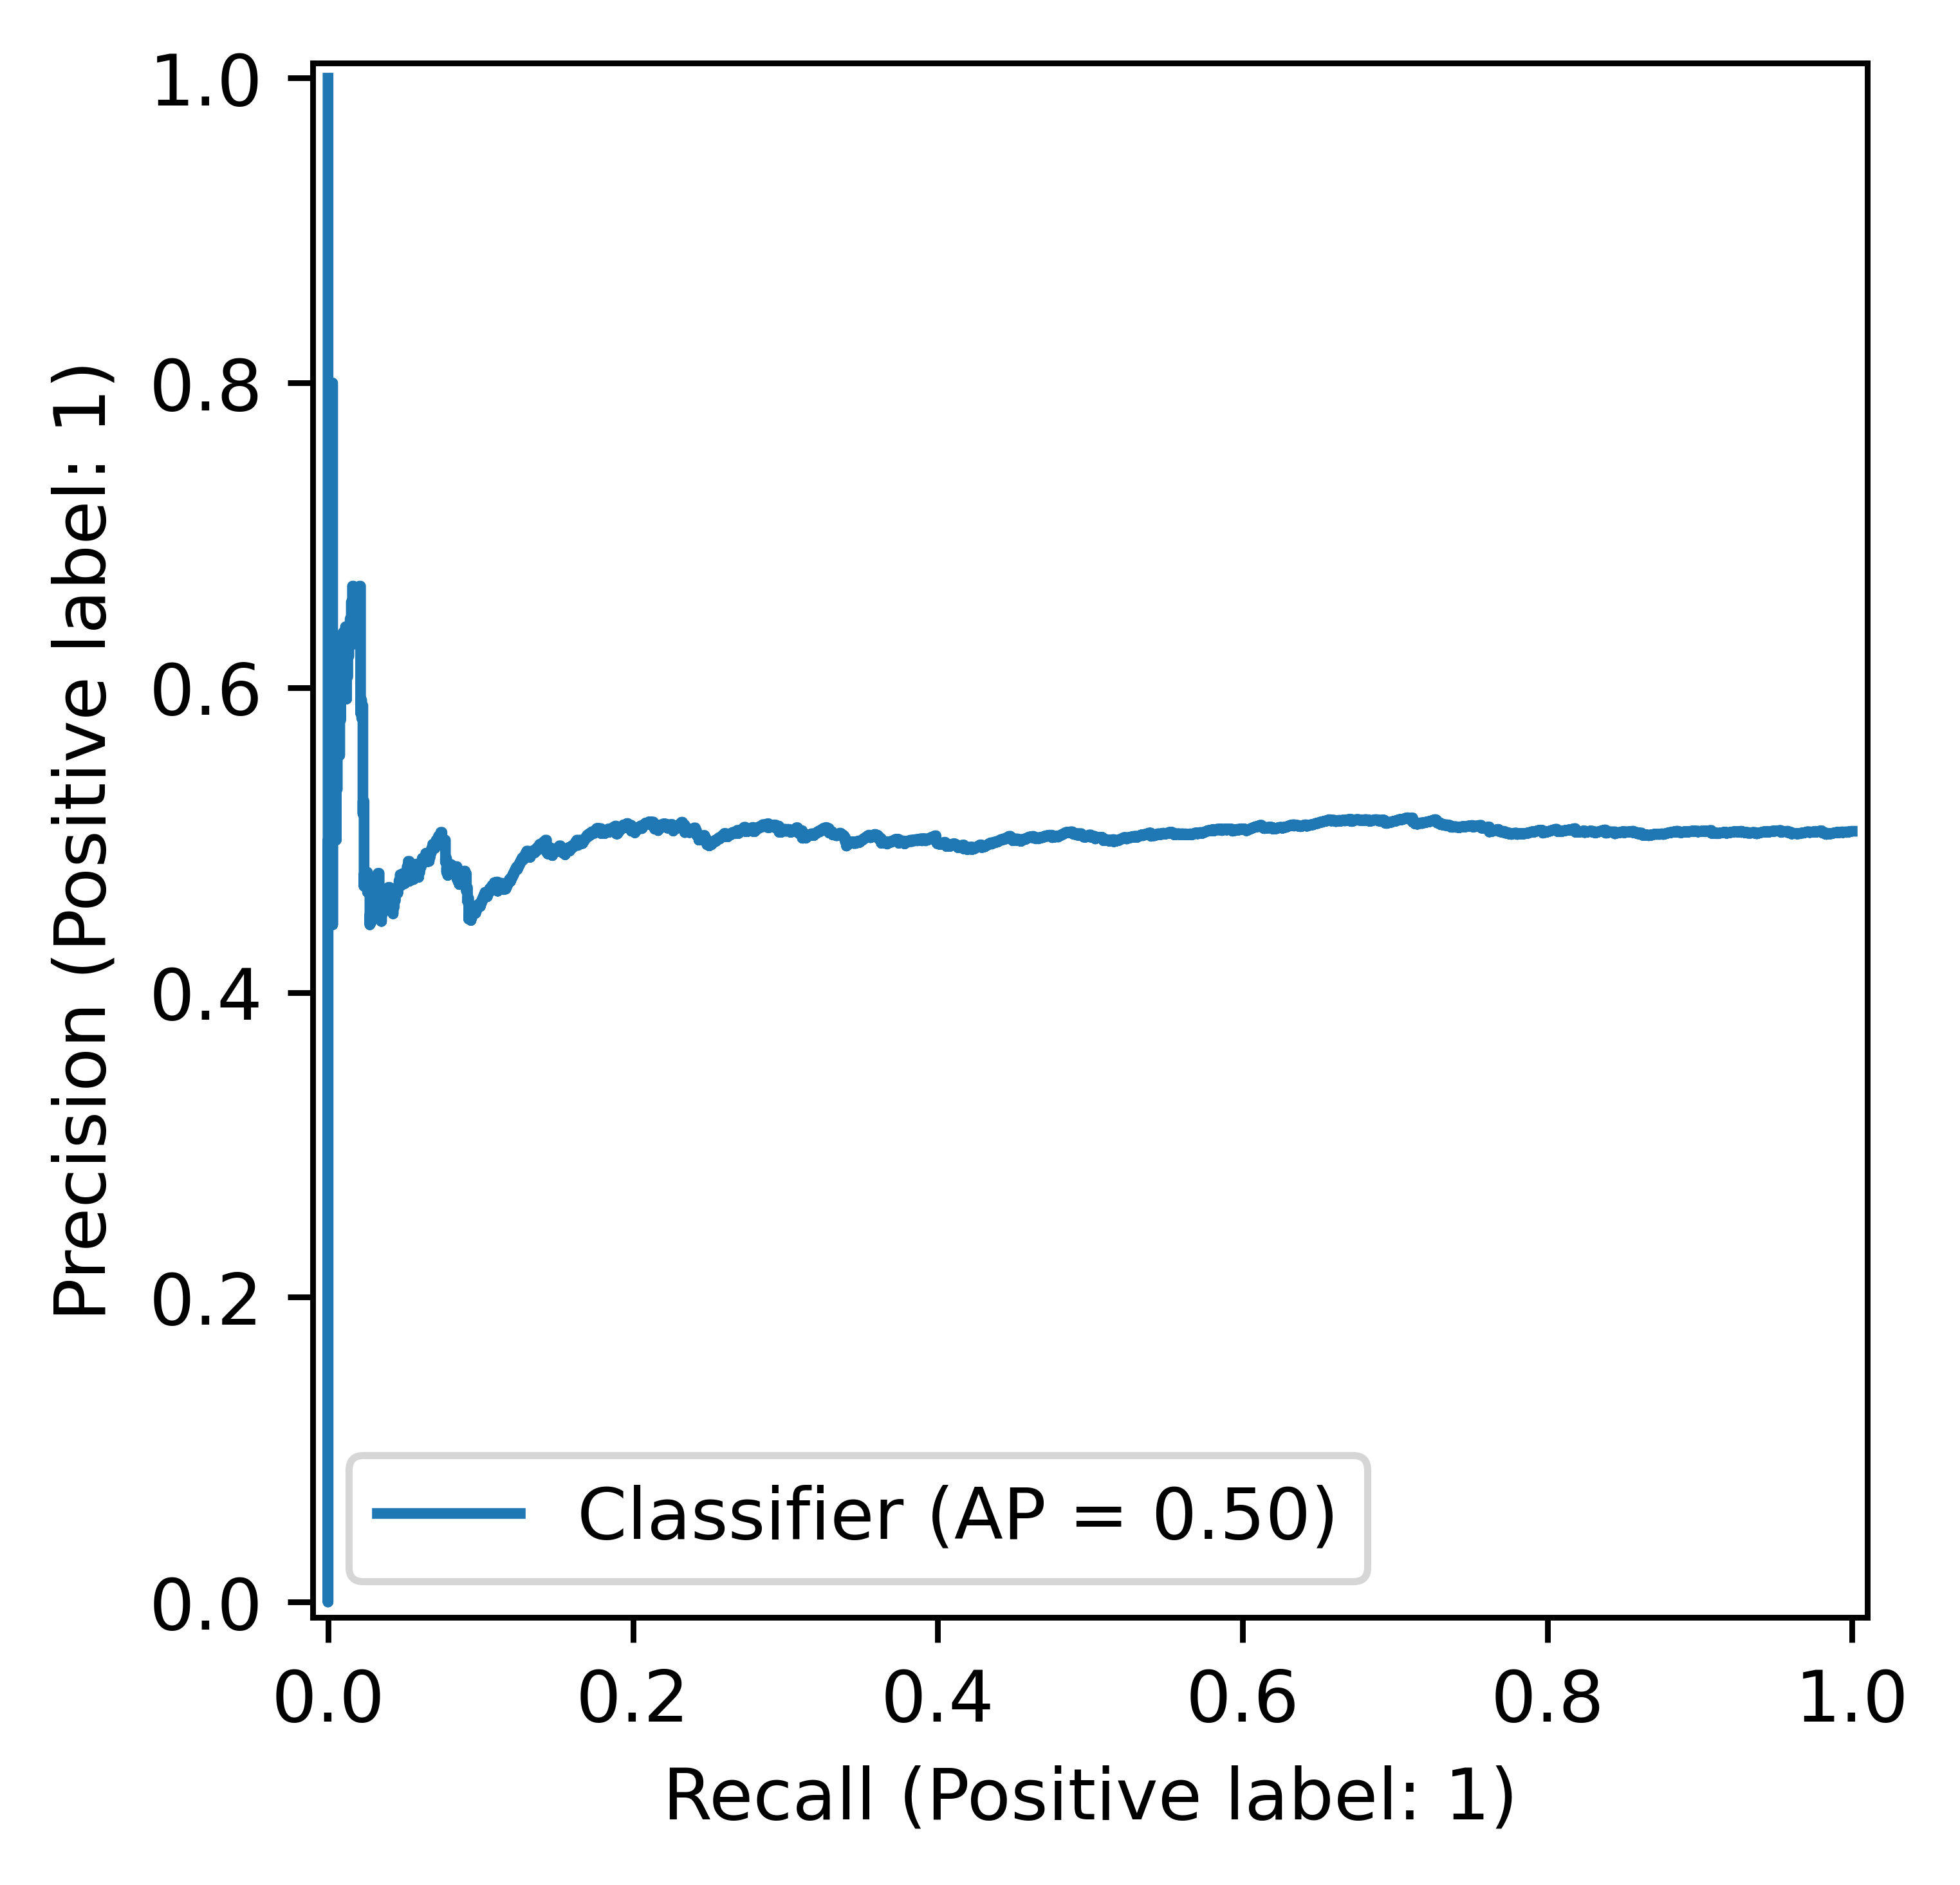

In [29]:
# random model

PrecisionRecallDisplay.from_predictions(data_b.target, np.random.uniform(0, 1, len(data_b)))

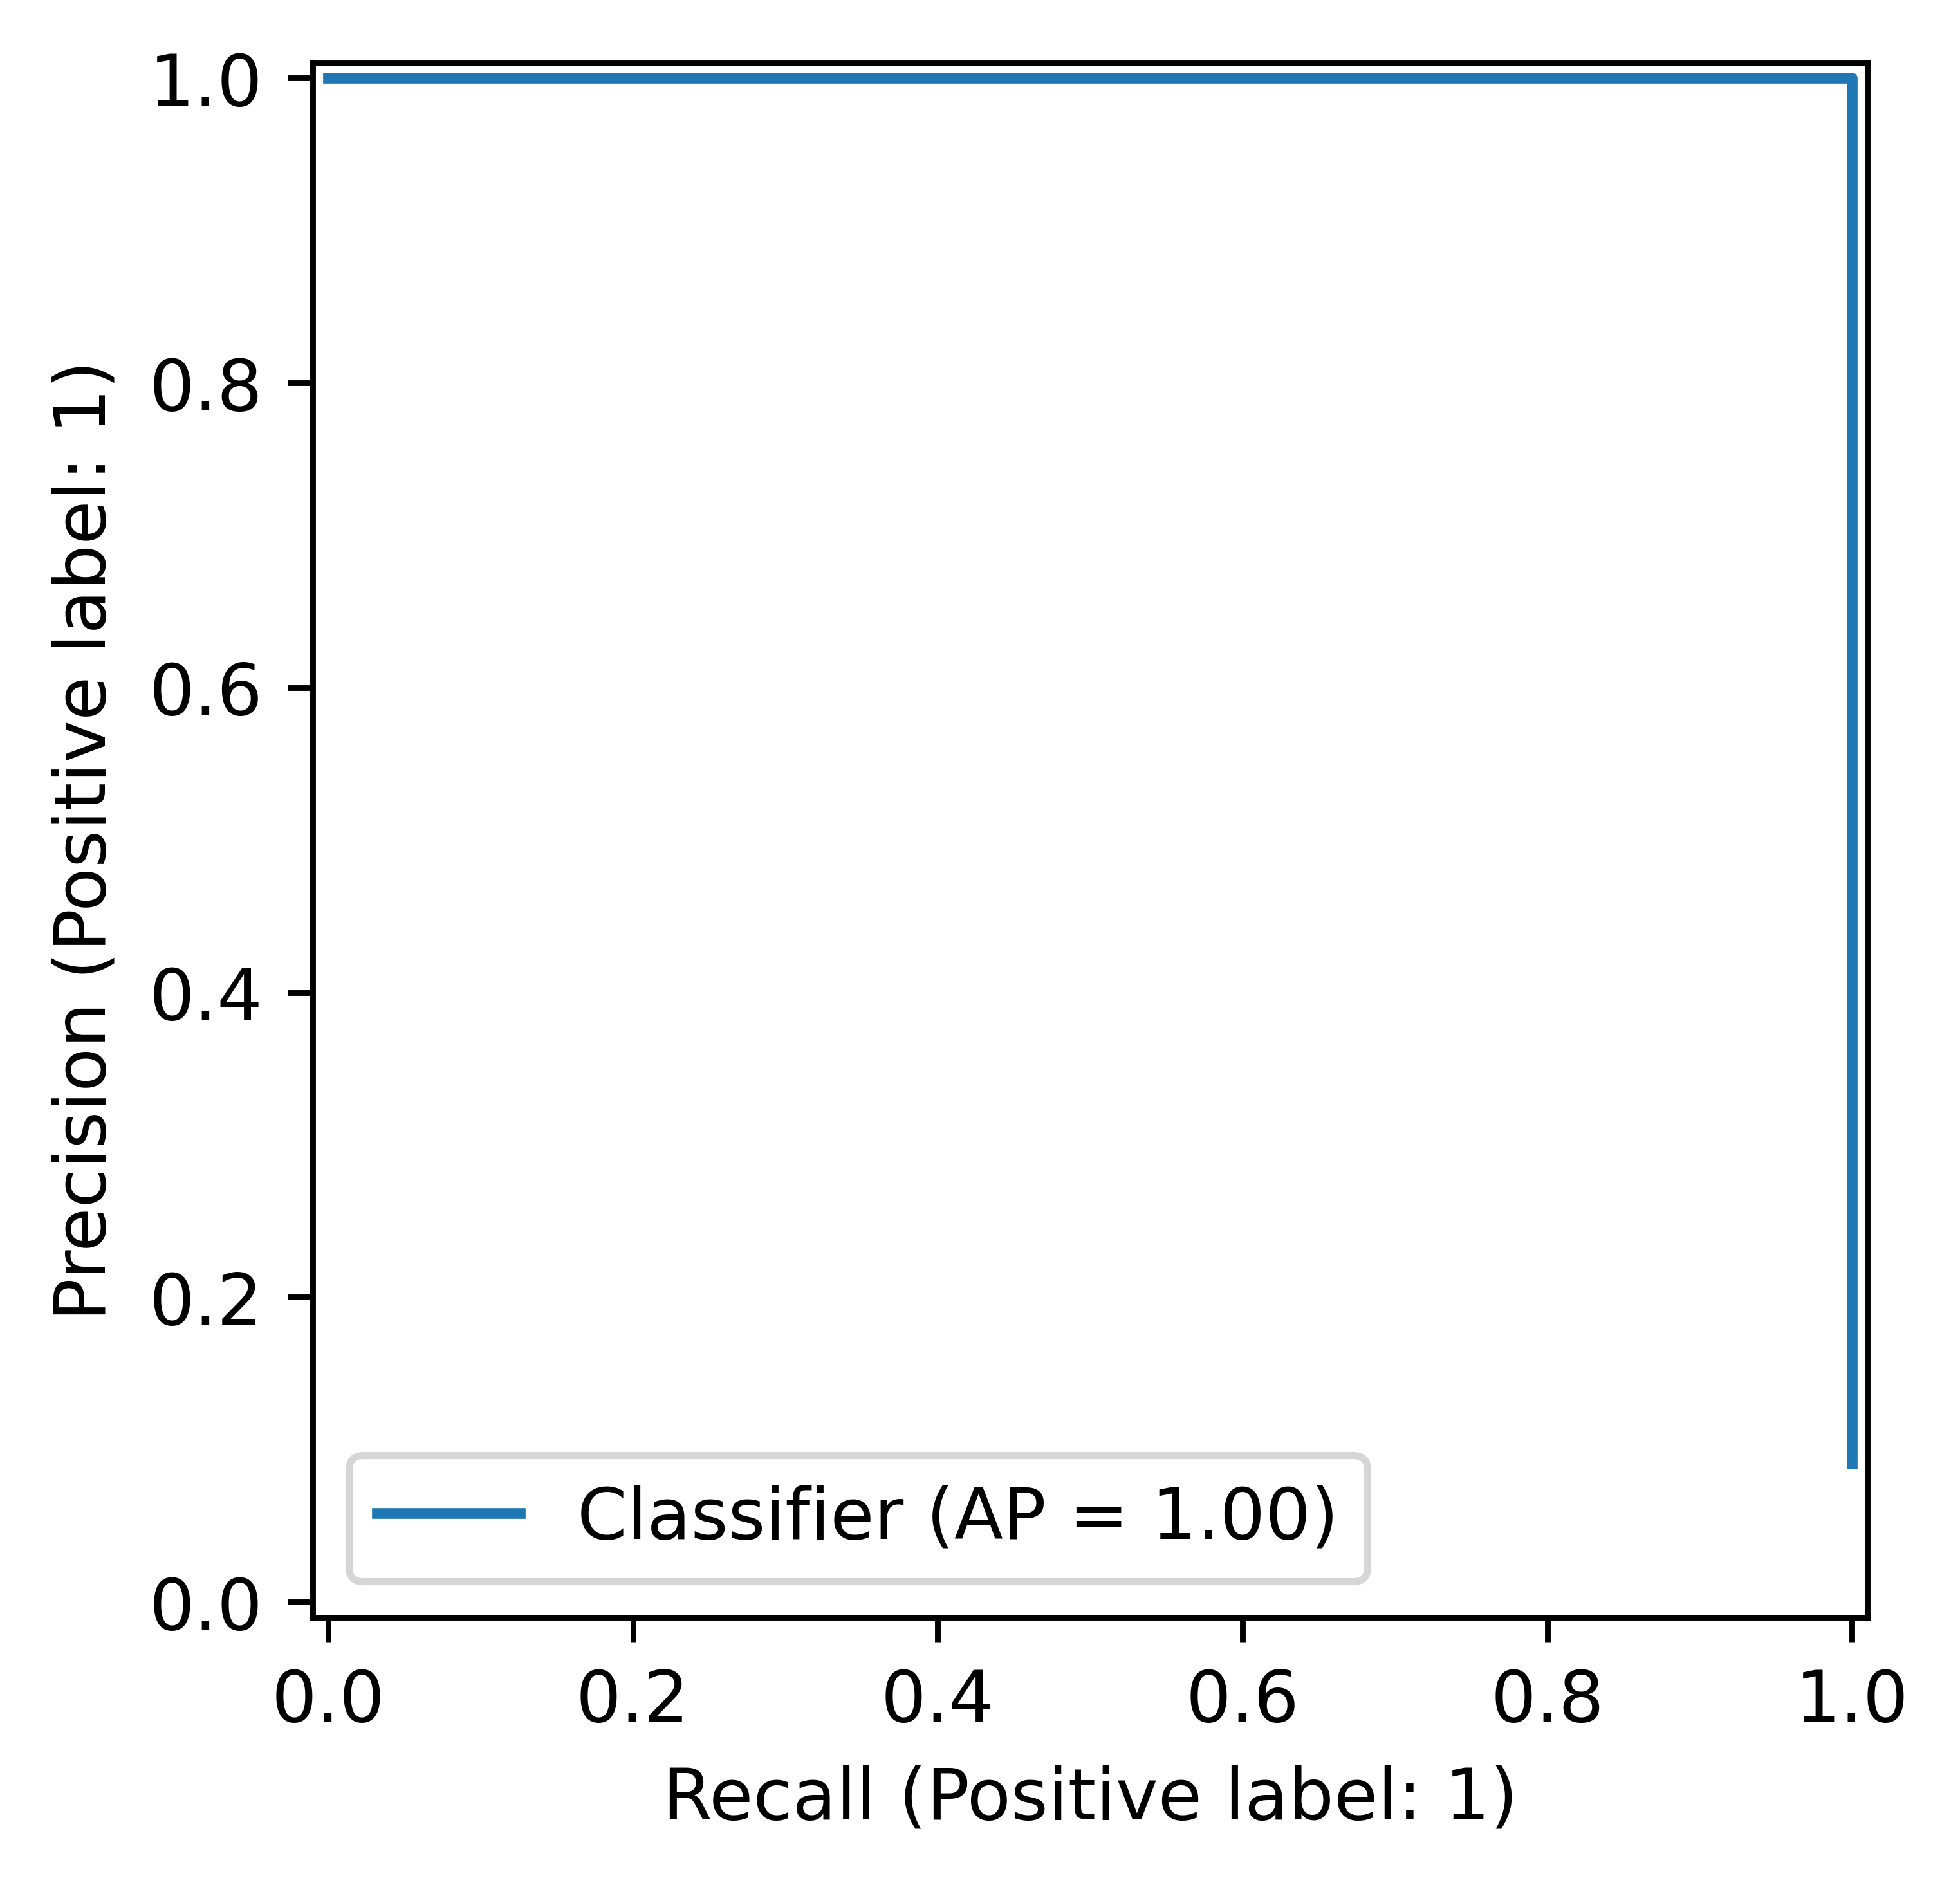

In [15]:
# perfect model

PrecisionRecallDisplay.from_predictions(data_01.target, data_01.target)

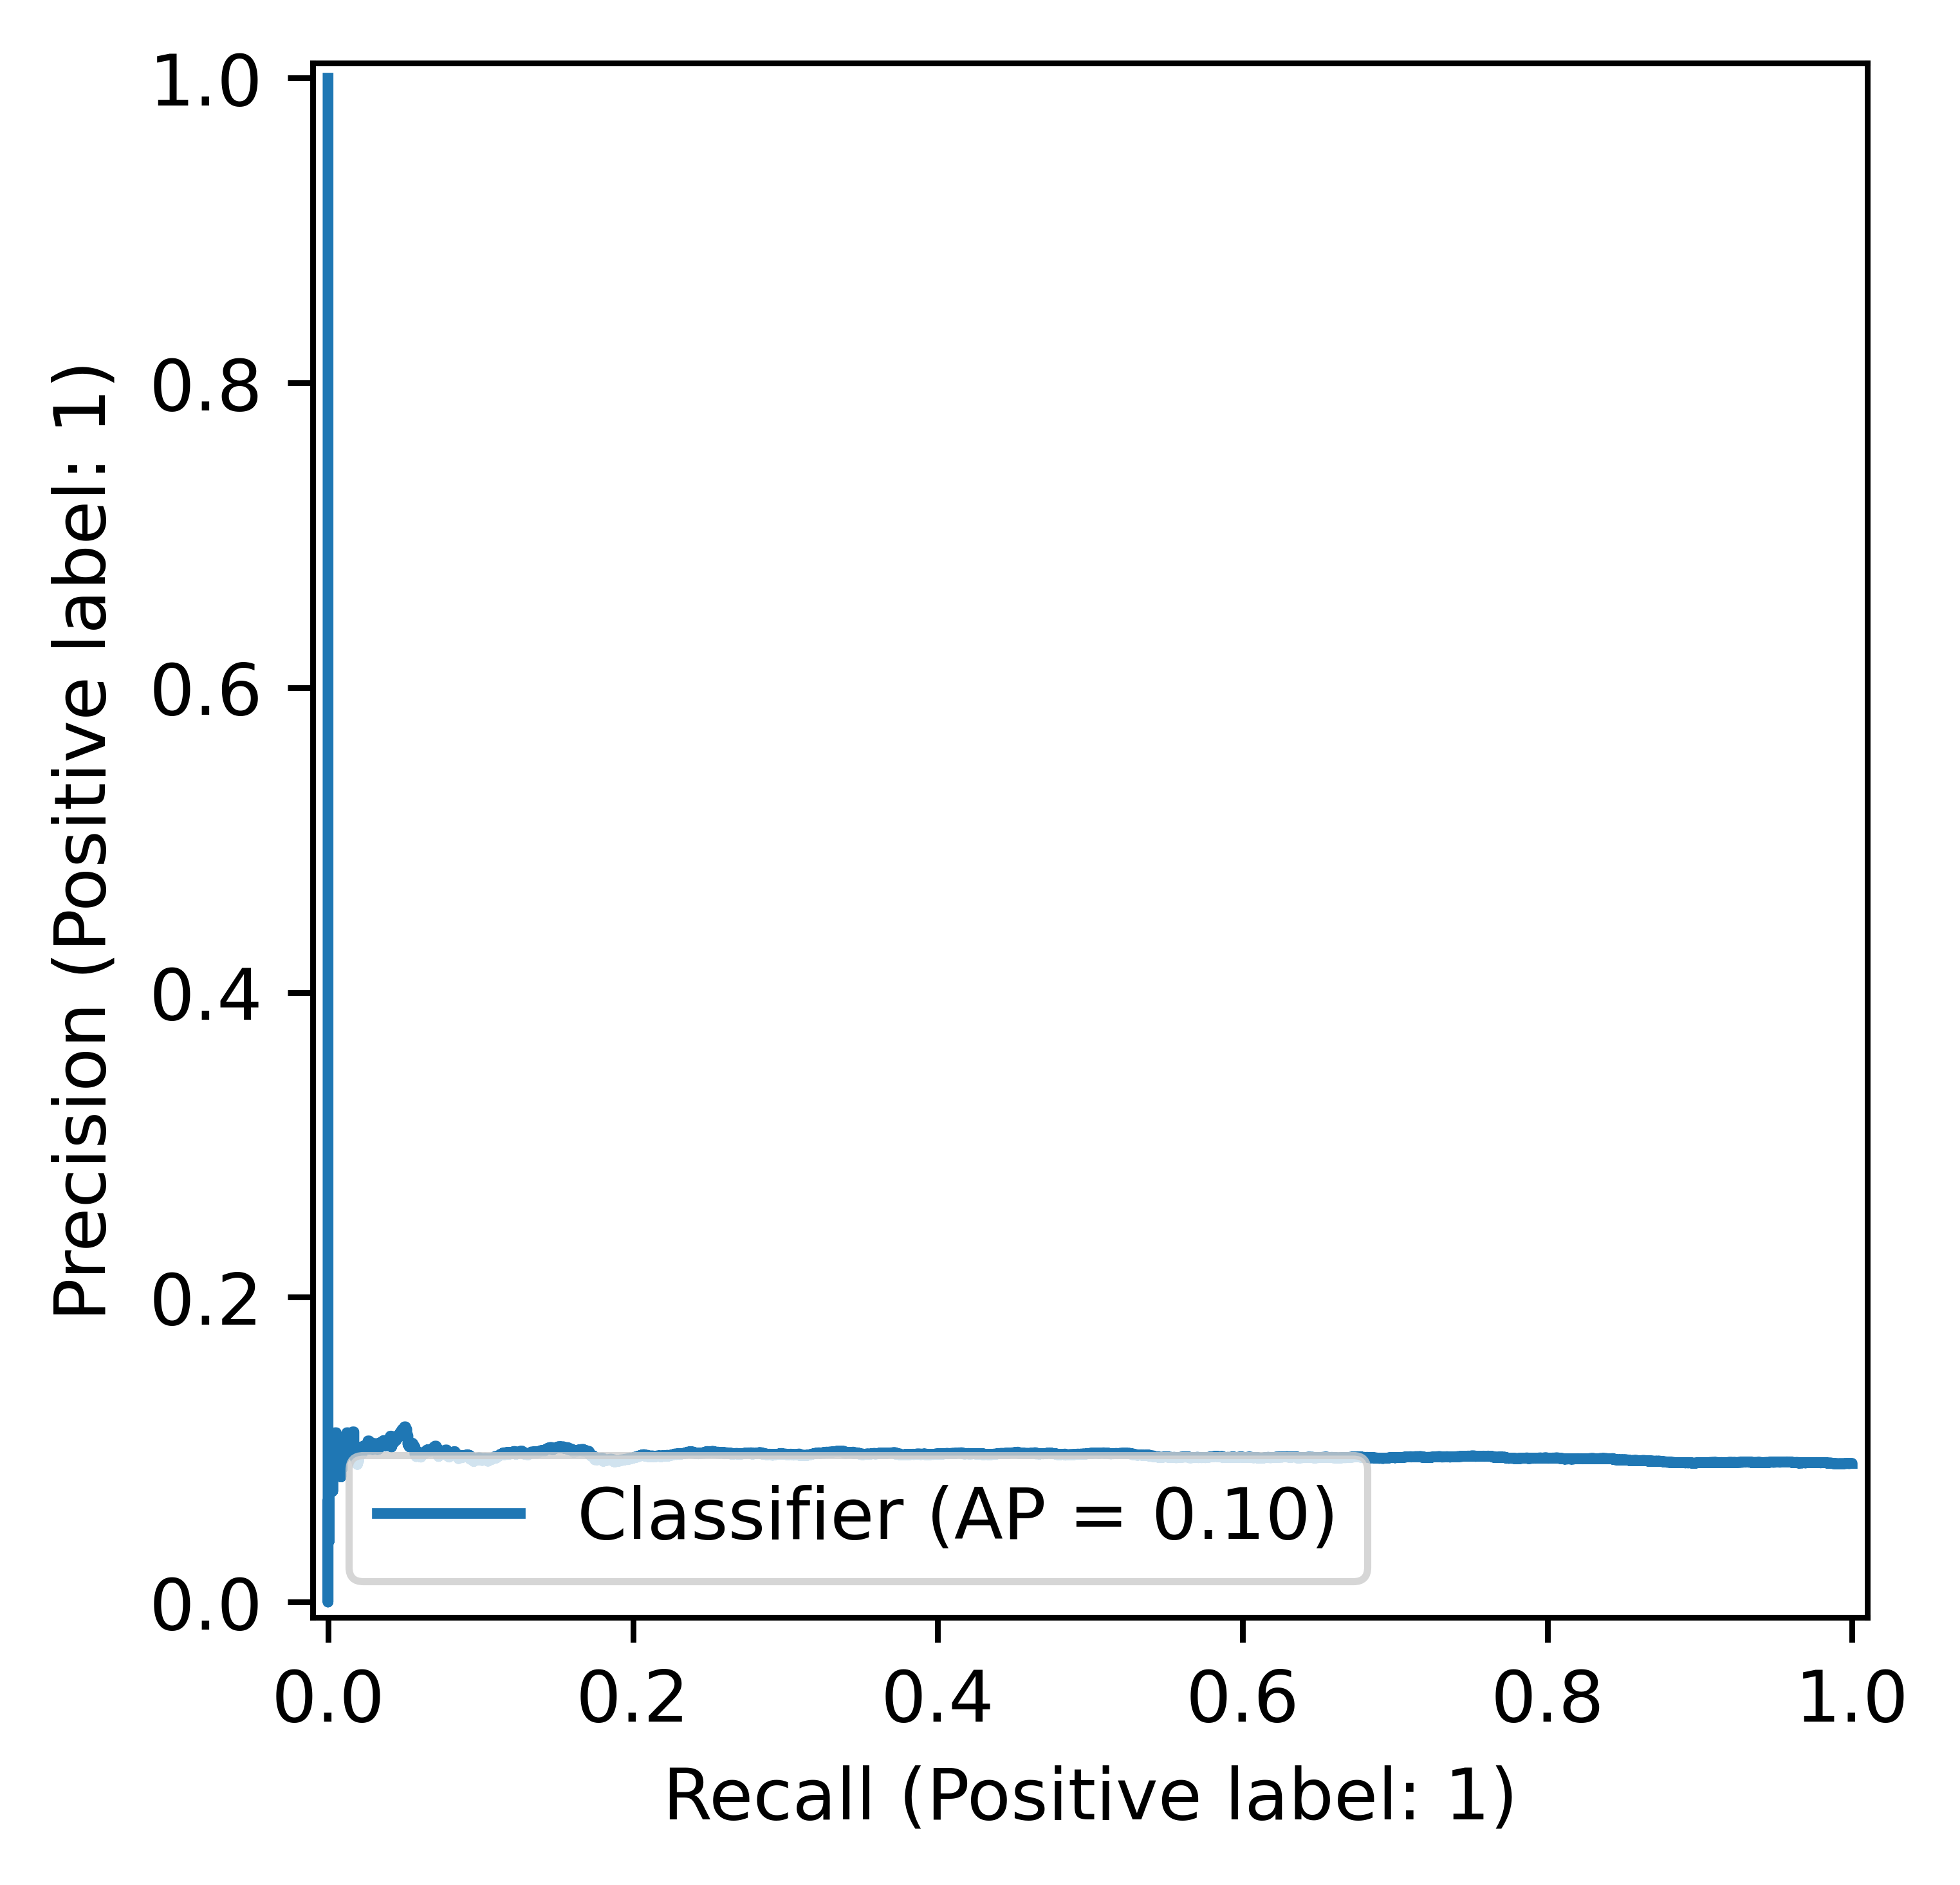

In [30]:
# random model 
PrecisionRecallDisplay.from_predictions(data_01.target, np.random.uniform(0, 1, len(data_01)))

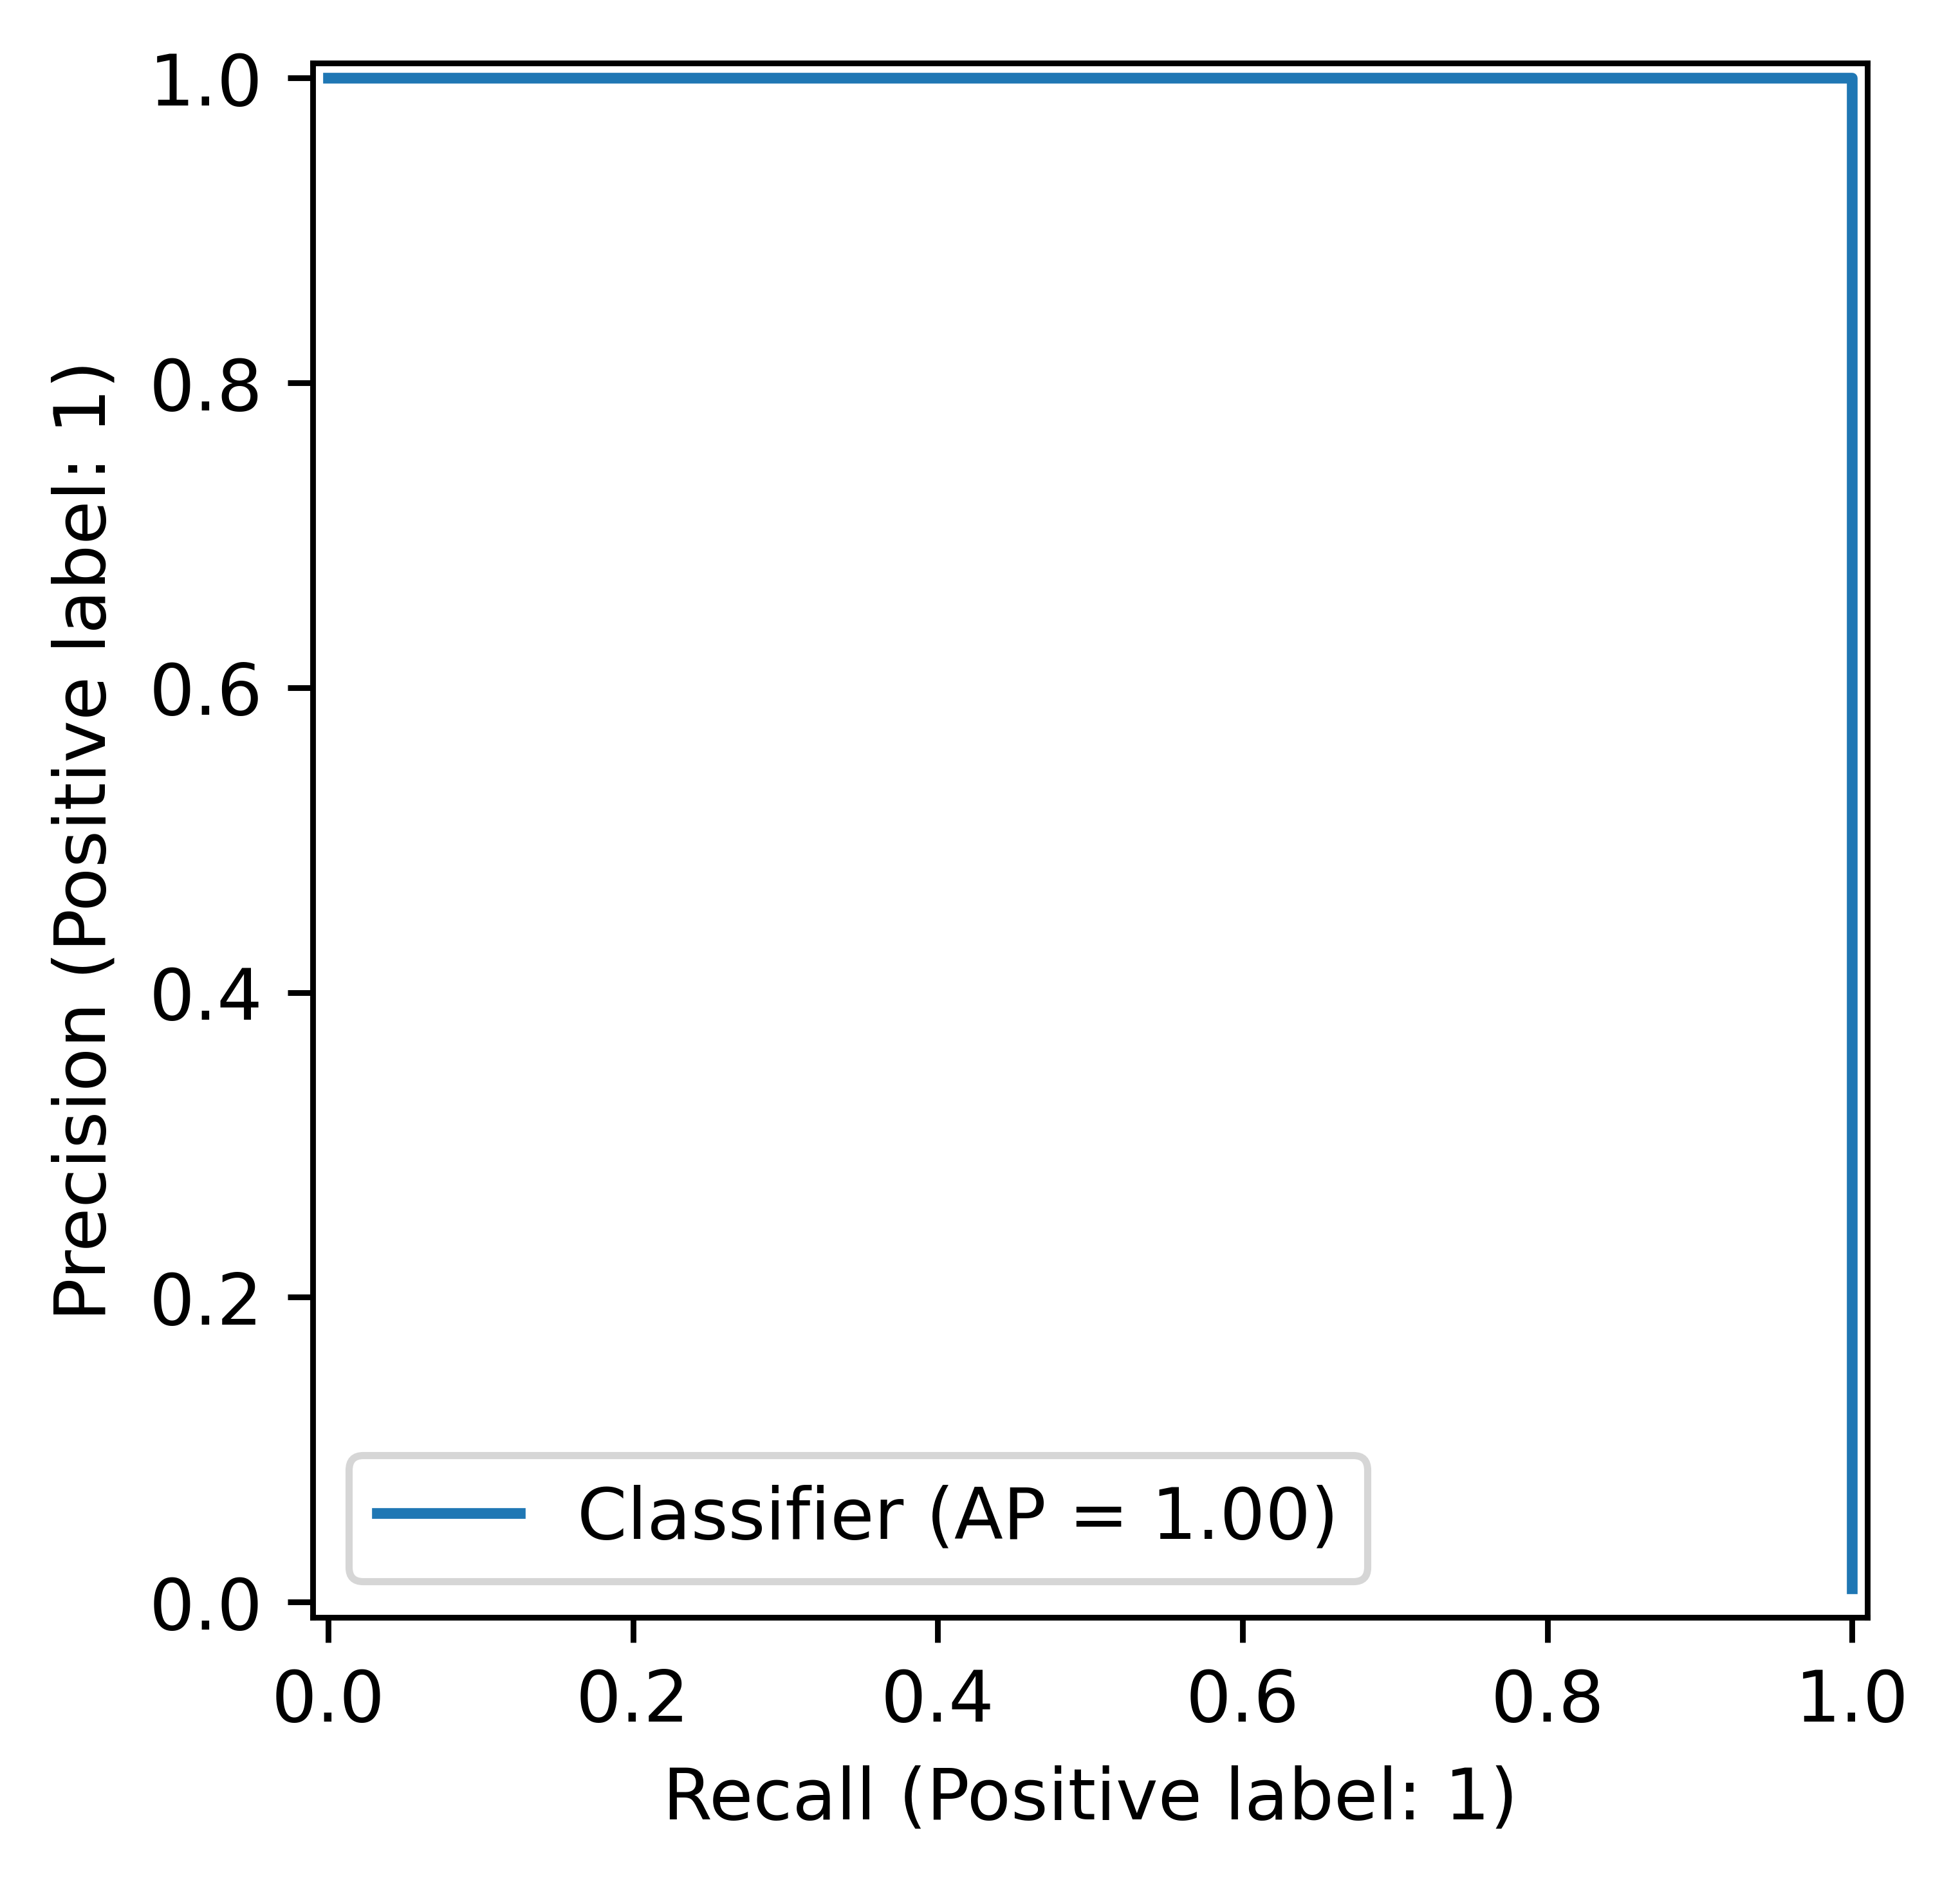

In [16]:
# perfect model

PrecisionRecallDisplay.from_predictions(data.target, data.target)

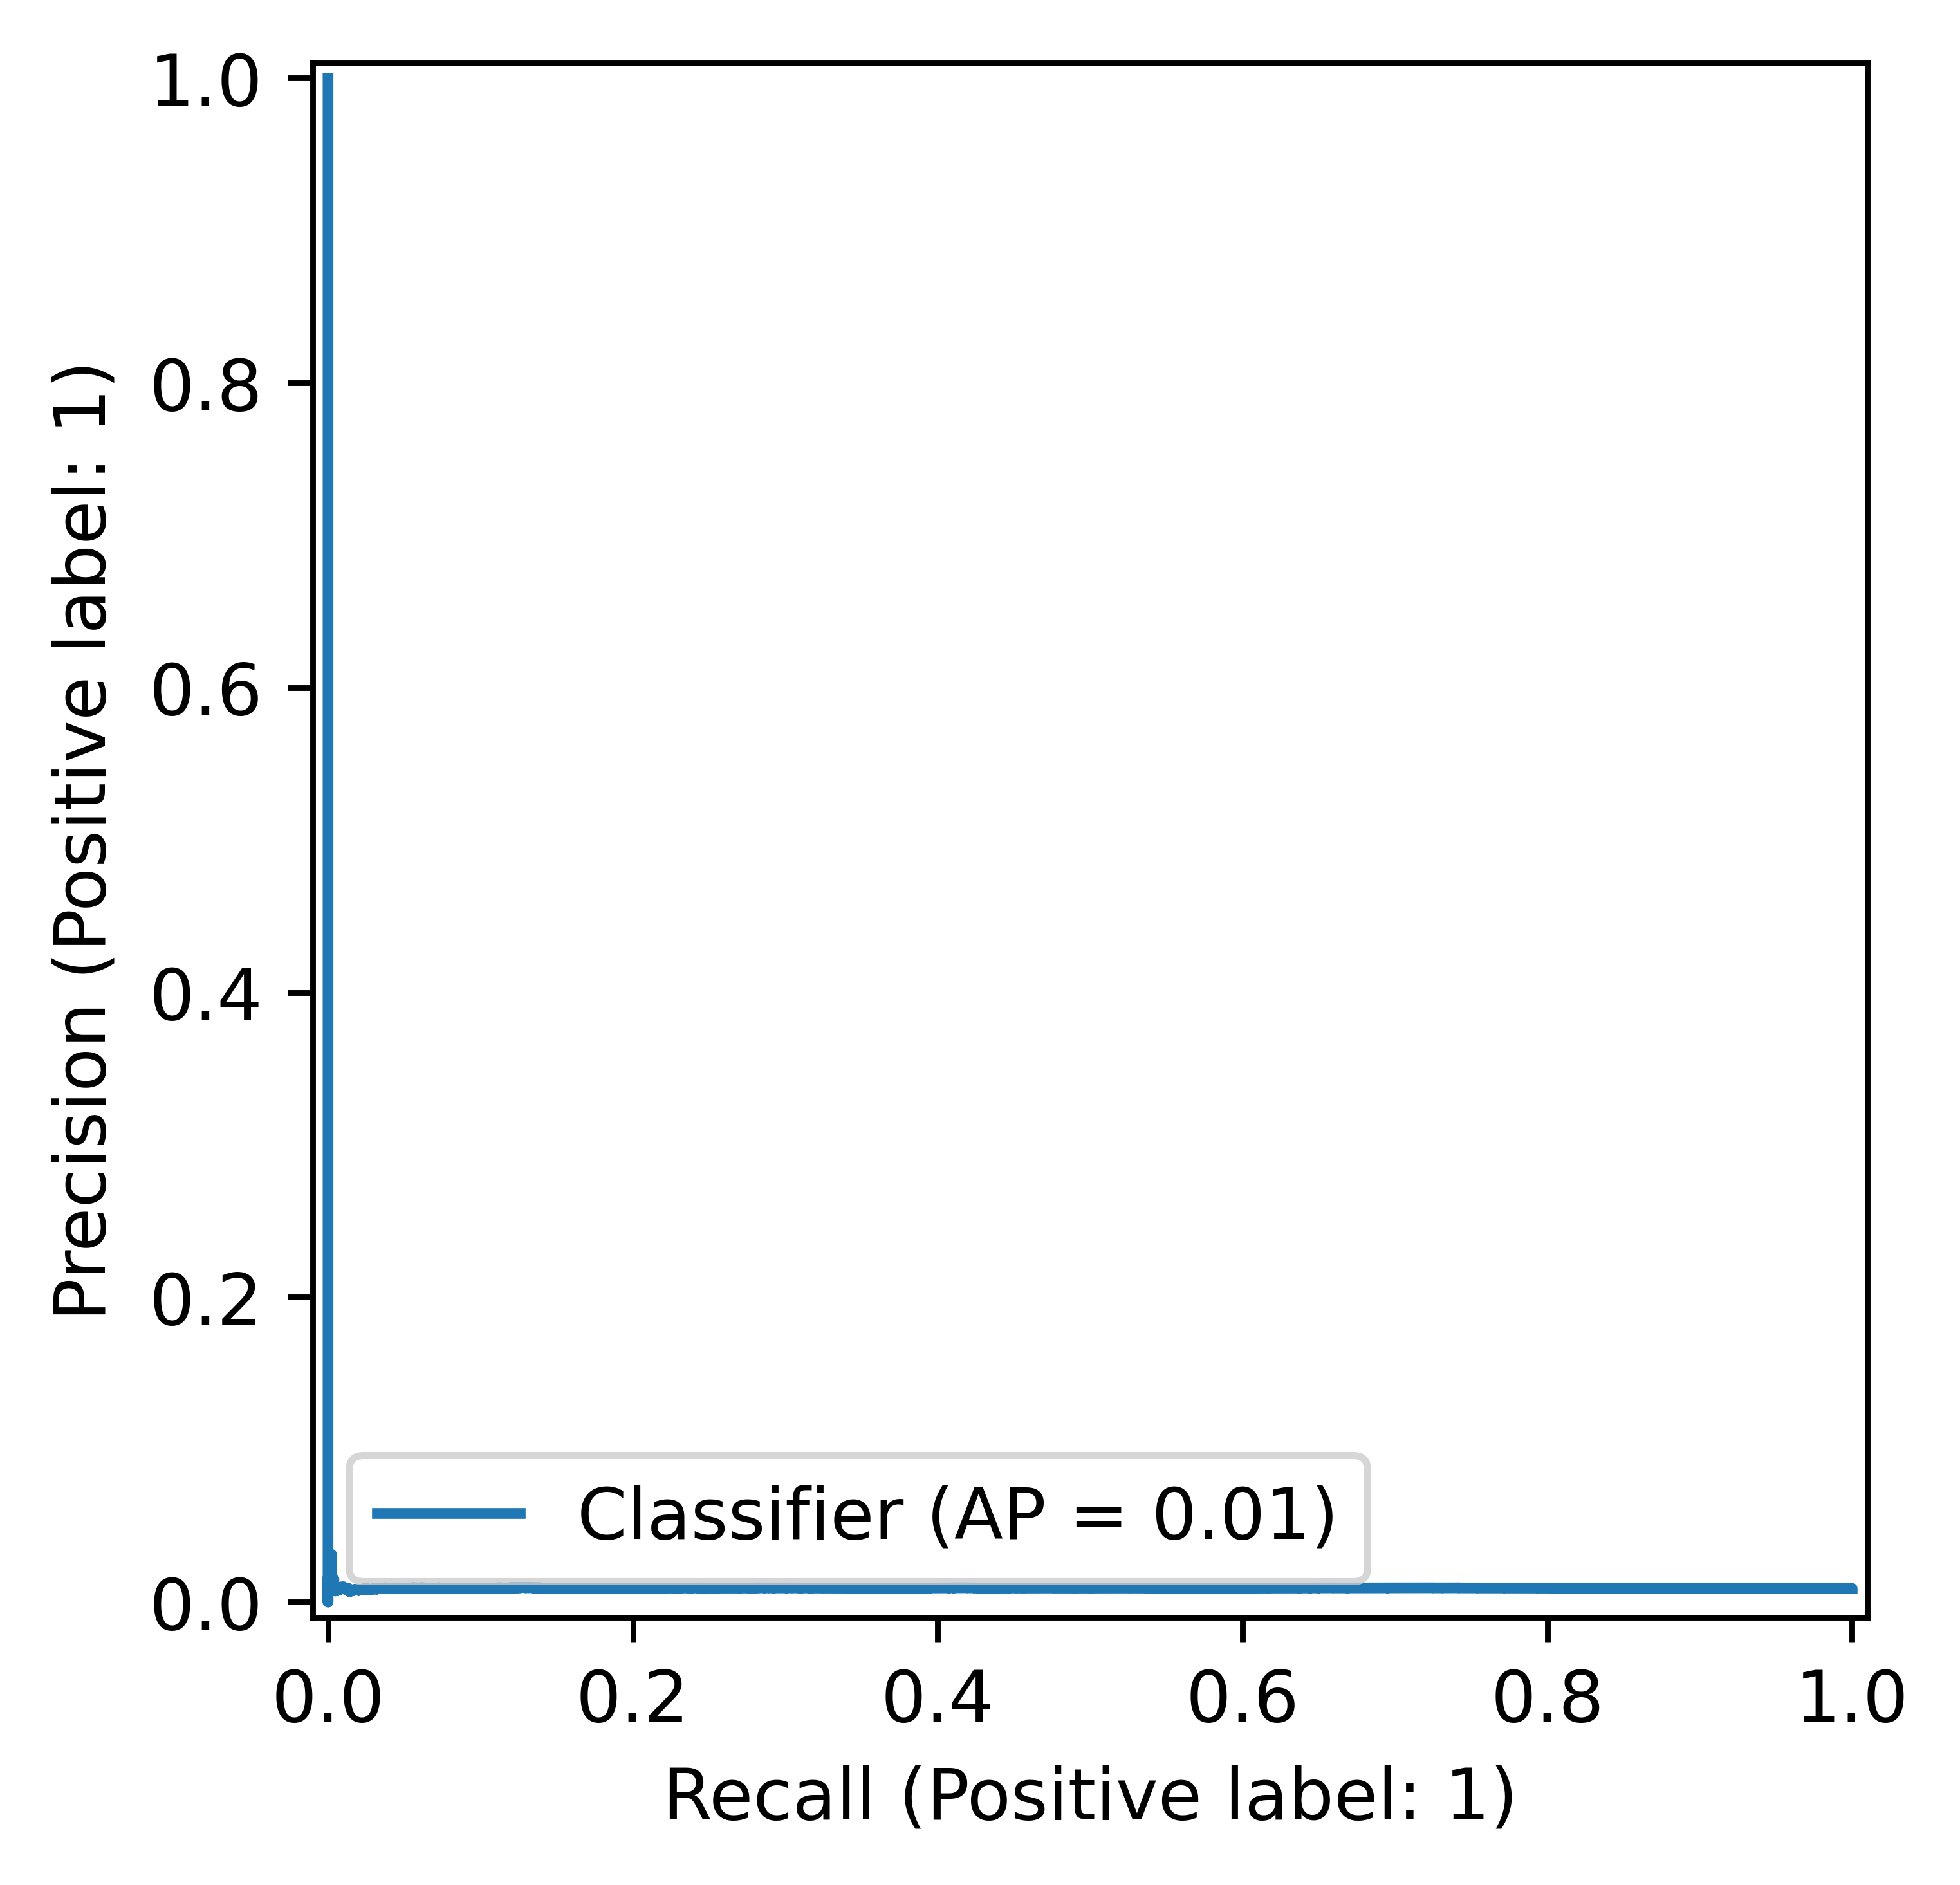

In [32]:
# random model 

PrecisionRecallDisplay.from_predictions(data.target, np.random.uniform(0, 1, len(data)))

## Models

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

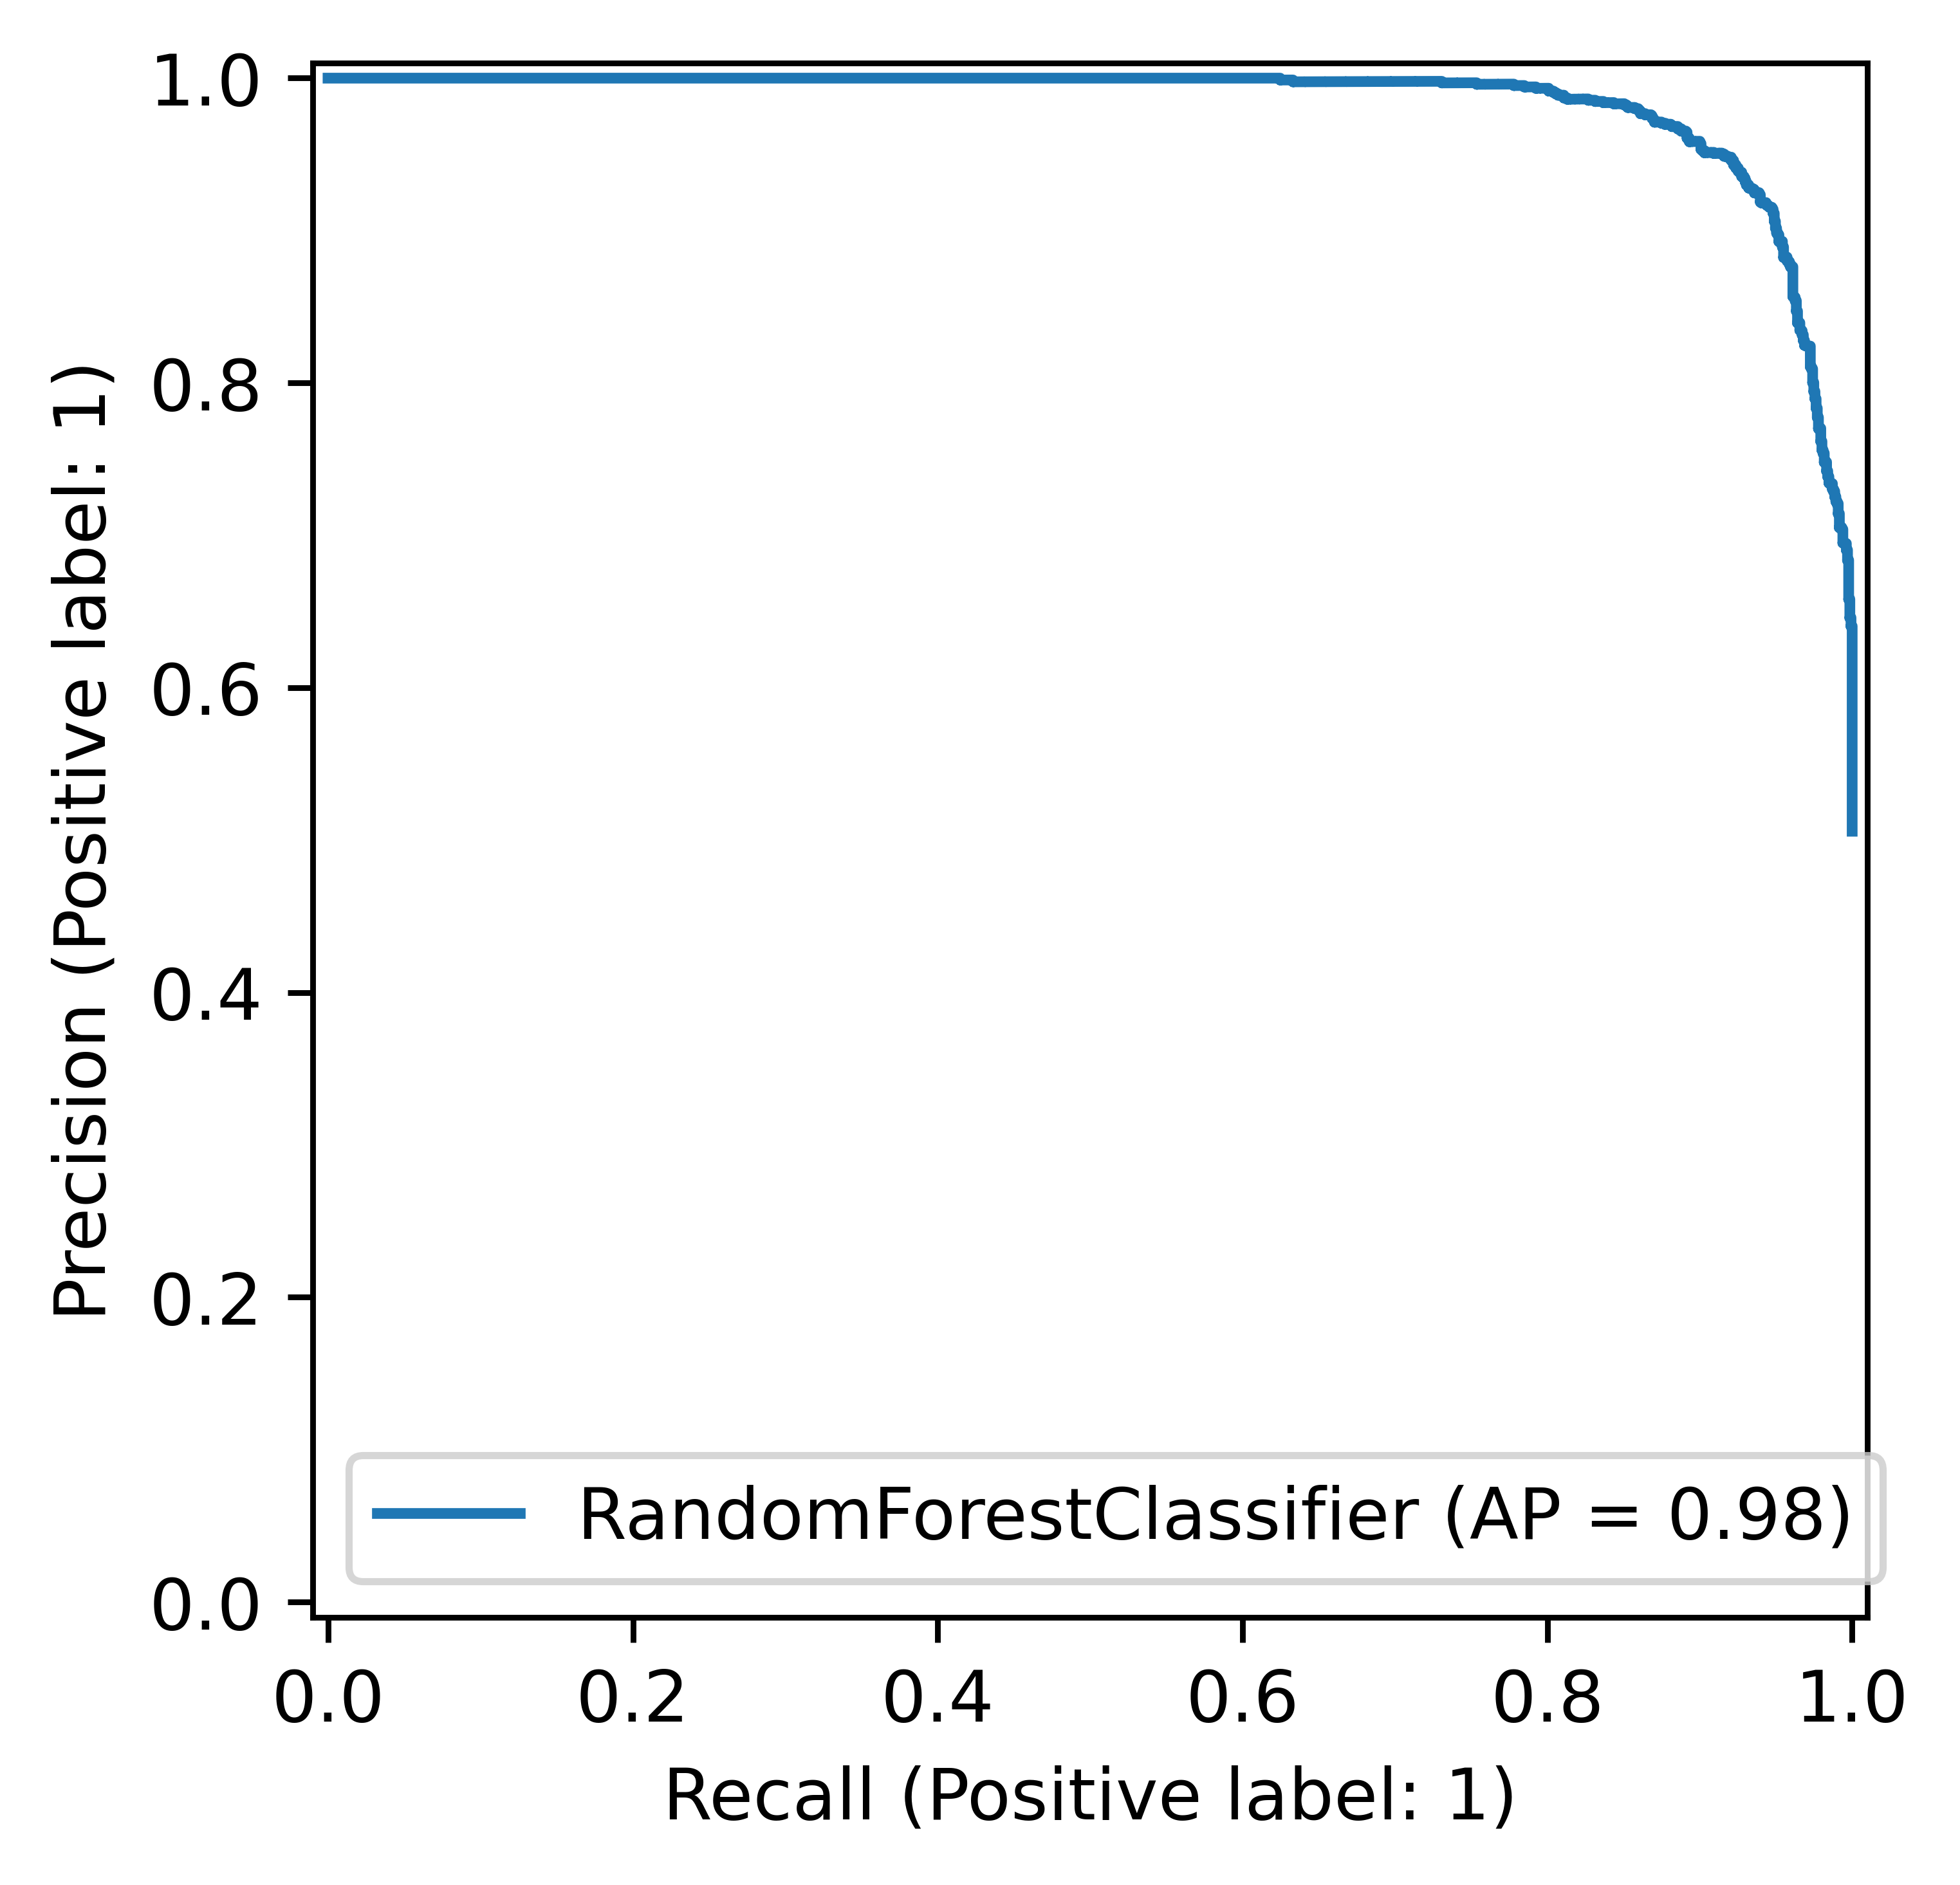

In [35]:
d = data_b.drop("target", axis=1)
t = data_b.target

model = RandomForestClassifier(
    n_estimators=100, random_state=39, max_depth=2, n_jobs=4).fit(d, t)

# model = LogisticRegression(
#     random_state=0,
#     max_iter=1000).fit(d, t)

logit = model

PrecisionRecallDisplay.from_estimator(logit, d, t)

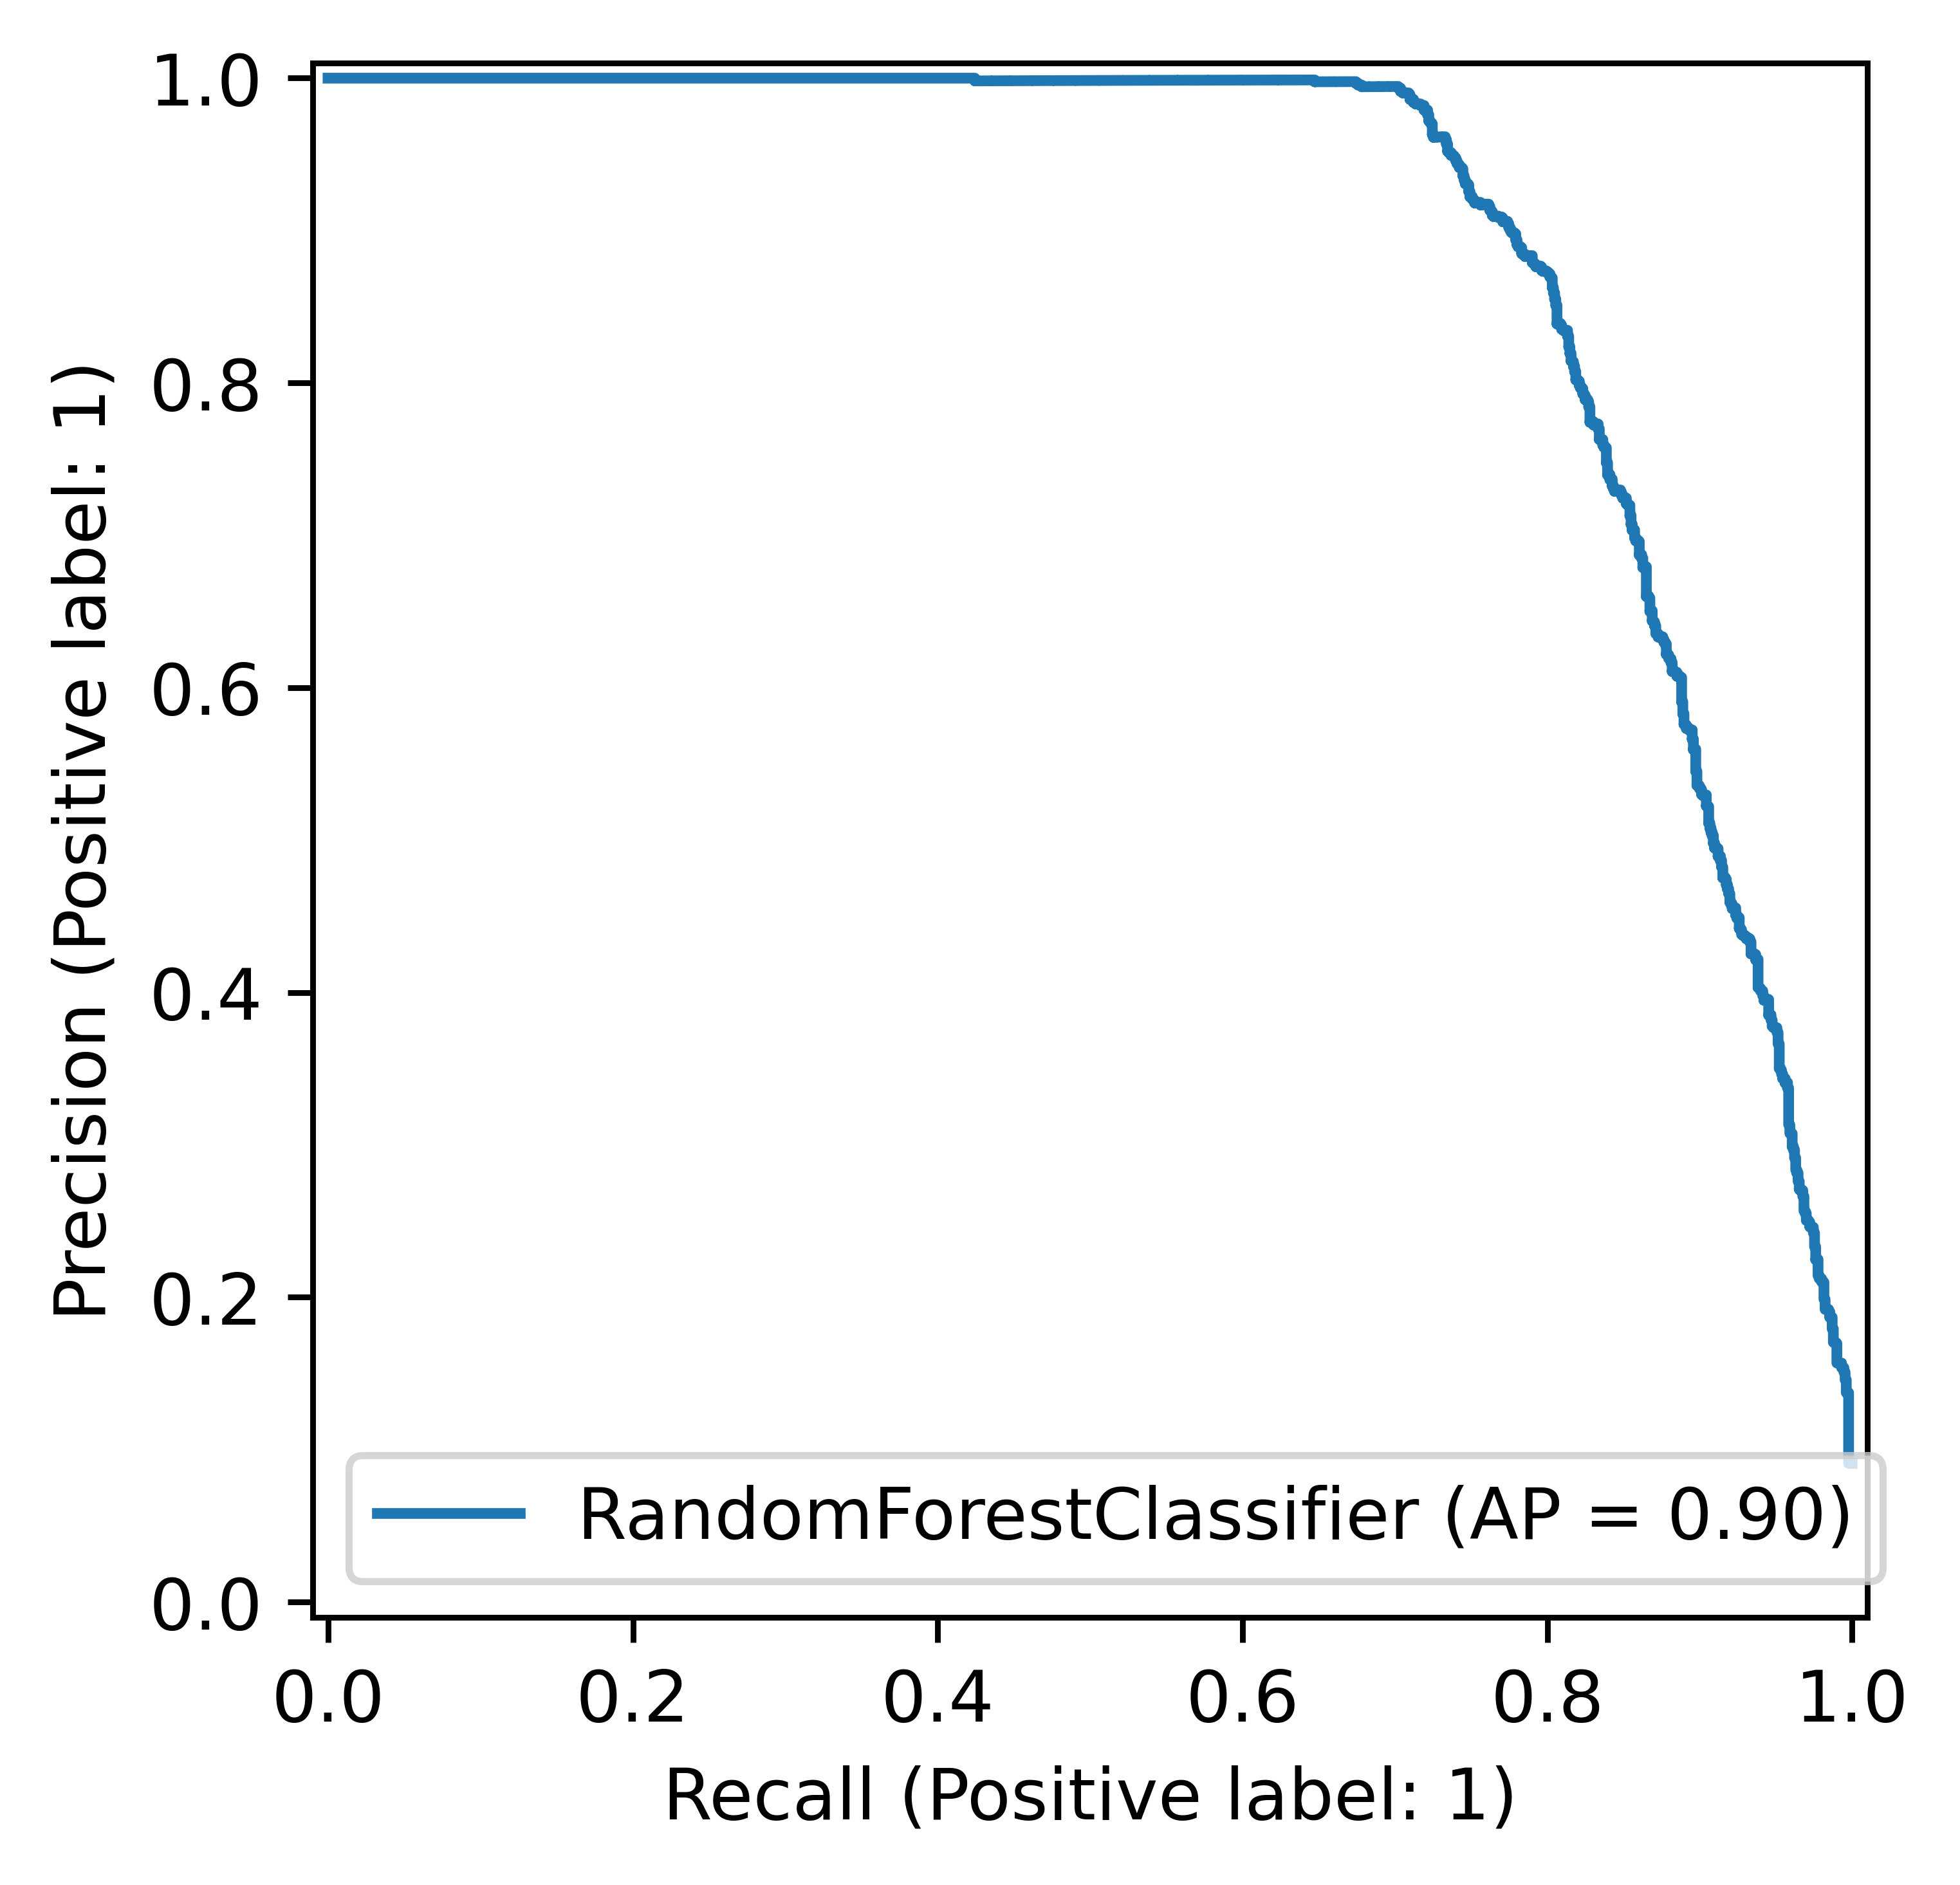

In [36]:
d = data_01.drop("target", axis=1)
t = data_01.target

model = RandomForestClassifier(
    n_estimators=100, random_state=39, max_depth=2, n_jobs=4).fit(d, t)

# model = LogisticRegression(
#     random_state=0,
#     max_iter=1000).fit(d, t)

logit = model

PrecisionRecallDisplay.from_estimator(logit, d, t)

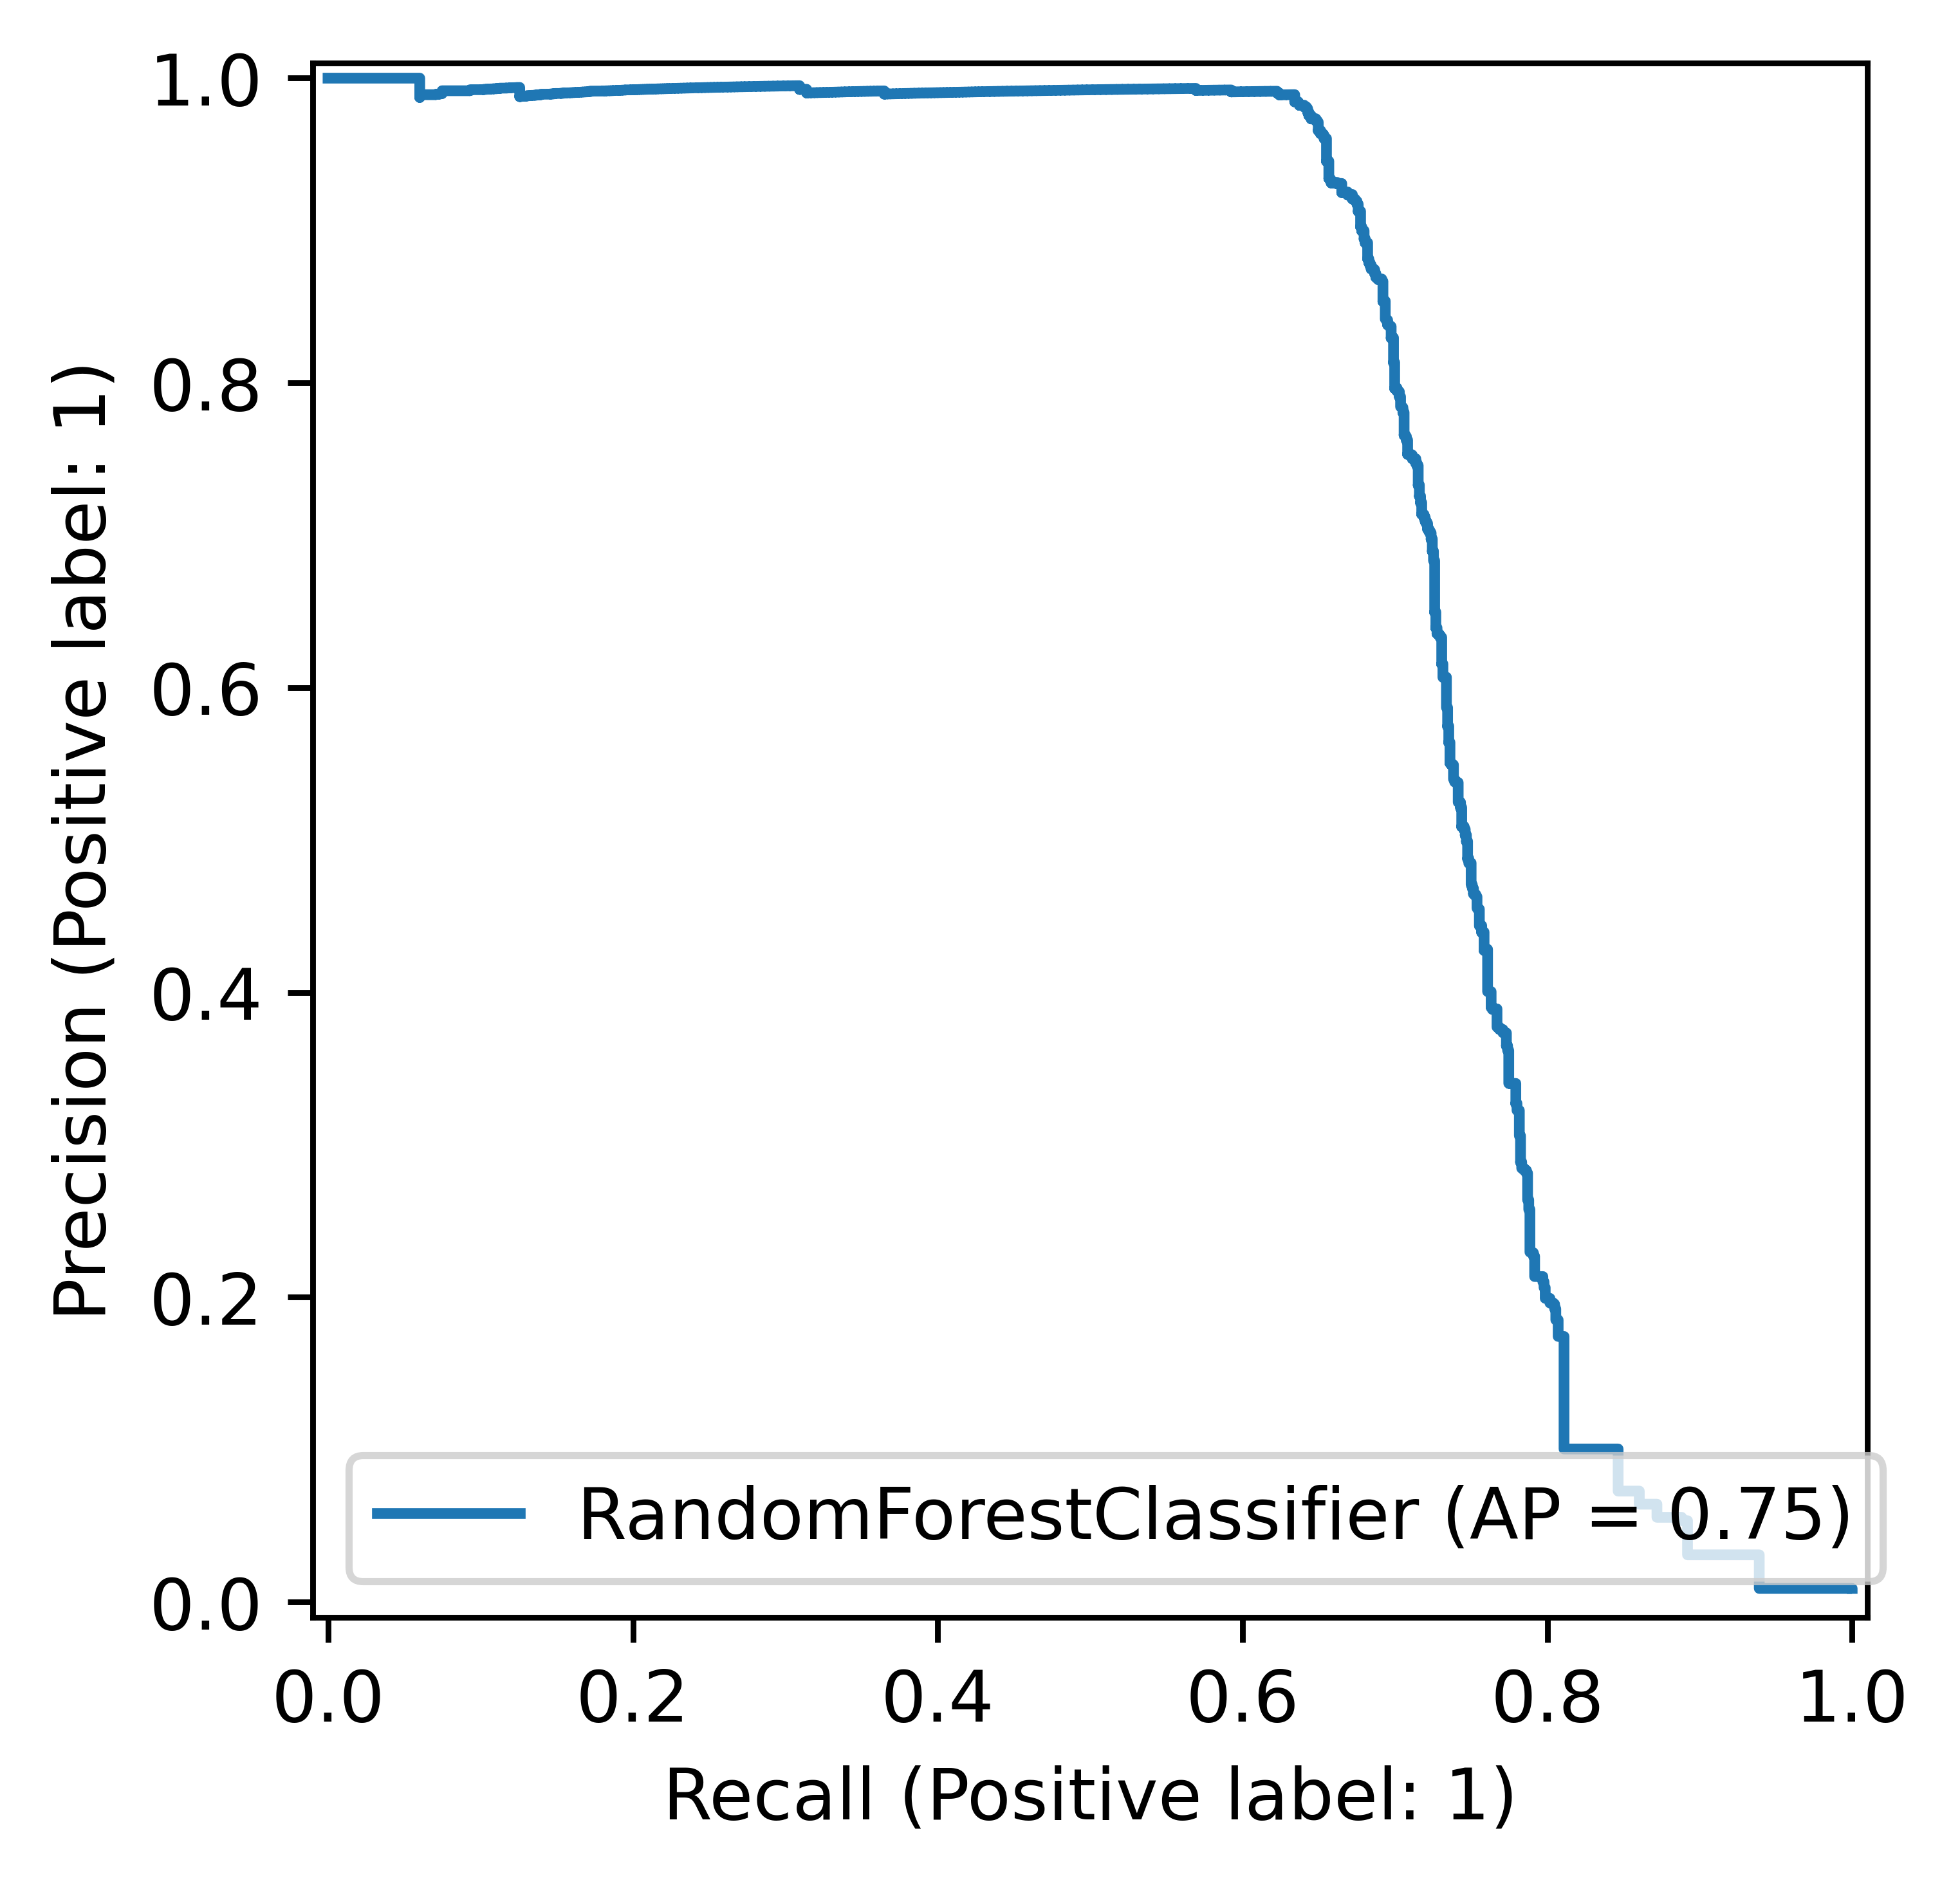

In [37]:
d = data.drop("target", axis=1)
t = data.target

model = RandomForestClassifier(
    n_estimators=100, random_state=39, max_depth=2, n_jobs=4).fit(d, t)

# model = LogisticRegression(
#     random_state=0,
#     max_iter=1000).fit(d, t)

logit = model

PrecisionRecallDisplay.from_estimator(logit, d, t)